In [1]:
import twint
import nest_asyncio
import pandas as pd
import re
import nltk
import numpy as np
import string
import json
import ast
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nest_asyncio.apply()

In [63]:
#This is only needed if using Google AutoMl
import sys
import proto
import os
from google.cloud import storage
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/ensli/webanalytics/GCloud key/apikey.json"

from google.api_core.client_options import ClientOptions
from google.cloud import automl_v1



ImportError: cannot import name 'service_pb2' from 'google.cloud.automl_v1.proto' (unknown location)

In [26]:
##Create DICT of search values
df = pd.read_excel('company_list2.xlsx', engine='openpyxl')
keys_dict = dict(zip(df['Name'], df['search_term']))
search_terms = keys_dict.values()


In [2]:
##function to scrape twitter with keyword
def scrape_tweets(since, value):
        print(value)
        c = twint.Config()
        c.Search = value
        c.Since = since
        #c.Until = '2020-07-15 12:41:00'
        c.Store_csv = True
        c.Output = "./" + value + '.csv'
        c.Hide_output = True
        c.Count = True
        c.Stats = True
        #c.Resume = 'resume.txt' #Might need to remove this when scraping a list of keywords
        twint.run.Search(c)
        


In [3]:
searchterms = ["'new website'"]

for term in searchterms:
    scrape_tweets('2019-01-01 12:00:00', term)
    
print('Scraping done')

'new website'
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 3056264 Tweets.
Scraping done


In [4]:
finaldf = pd.read_csv ('new website.csv')


In [3]:
df2 = pd.read_csv  ('skateboarding.csv')
#df3 = pd.read_csv ('Wayfair OR $W3.csv') 
finaldf = finaldf.append(df2,ignore_index=True)
#dataframe = dataframe.append(df3,ignore_index=True)



In [8]:

finaldf = finaldf[['id','date','tweet','language','hashtags','cashtags','user_id','username','name','likes_count','replies_count','retweets_count']]

#finaldf = finaldf[finaldf.tweet.str.contains("\"new website\"")]

#list_of_words_to_exclude = ["conspiracy", "trafficking", "sex", "Trafficking"]

#finaldf = finaldf[~(finaldf.tweet.str.contains("Trafficking")) | ~(finaldf.tweet.str.contains("trafficking")) | ~(finaldf.tweet.str.contains("conspiracy")) | ~(finaldf.tweet.str.contains("sex"))]

#finaldf = finaldf[~(finaldf.tweet.str.contains("Tony"))]

In [126]:
#delete rows in certain date range
finaldf['date'] = pd.to_datetime(finaldf['date']) #change date column datatype to datetime
finaldf = finaldf[~(finaldf['date'].dt.month == 7)] #Change number to correspond to the month you want to exclude
finaldf.head(5)

,id,date,tweet,language,hashtags,cashtags,user_id,username,name,likes_count,replies_count,retweets_count
1,1.344965e+18,2021-01-01,(USA) Cook Up Your Dream Kitchen Sweepstakes E...,en,[],[],1.236526e+08,mariasmusings,Maria Appleby,0,0,0
2,1.344964e+18,2021-01-01,Wayfair is looking for a Facility und Maintena...,en,[],[],1.001797e+18,allexecjobs,✈️ Executive Startup Jobs,0,0,0
3,1.344962e+18,2021-01-01,Wayfair is growing! 💪 Hiring a Facility und M...,en,[],[],1.001797e+18,allexecjobs,✈️ Executive Startup Jobs,0,0,0
4,1.344960e+18,2021-01-01,Food Network Wayfair Dream Kitchen Sweepstakes...,en,[],[],1.036338e+18,nikip4nu,Nicole P🐾,0,0,0
5,1.344959e+18,2021-01-01,Has anyone ordered bedroom furniture from Wayf...,en,[],[],1.499572e+08,paulandrews22,Paul Andrews,0,1,0


In [35]:
finaldf.to_csv('check.csv')

In [9]:
#1
def remove_punct(text):
    text = re.sub(r"http\S+", " ", text) #remove urls
    text = re.sub(r'\S+\.com\S+',' ',text) #remove urls
    text = re.sub(r'\@\w+',' ',text) #remove mentions
    text = re.sub(r'\#\w+', ' ',text) #remove hashtags
    text = re.sub(r'amp', '', text) #remove amp word. not sure if this works
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

finaldf['Tweet_punct'] = finaldf['tweet'].apply(lambda x: remove_punct(x))


In [10]:
#3 stopwords
 
finaldf['Tweet_nonstop'] = finaldf['Tweet_punct'].apply(lambda x: remove_stopwords(x))


In [9]:
finaldf.head(10)

,id,date,tweet,language,hashtags,cashtags,user_id,username,name,likes_count,replies_count,retweets_count
166097,1359452909482745863,2021-02-10,"@KatieUniacke I had ""new website"" on my to-do ...",en,[],[],2904077686,johnlovesjulie,"Ian Winick, Translator & Copywriter 🇮🇪🇩🇪🇪🇺",7,3,0
169695,1359159613464190978,2021-02-09,"@melindaharing Well, not all of the RU propaga...",en,[],[],2212772029,alexpanchenko2,Alex Panchenko,1,0,1
174552,1358763506854690816,2021-02-08,I presume someone has told @LondonMarathon tha...,en,[],[],18331602,claire_michelle,Claire,0,0,0
251922,1351799924489416705,2021-01-20,"Over half a year into project ""new website"" an...",en,[],[],55936490,hirami_de,Hirami ⊗,1,1,0
267509,1350144310218534913,2021-01-15,There is nothing more disheartening than seein...,en,[],[],1004303604537266176,superdivineweb,Trace 🕸,1,0,0
347577,1343201223034470402,2020-12-27,@LLinWood @GaSecofState Did you get the videos...,en,[],[],51038435,gcmike,Mike Schoonmaker,0,0,0
377465,1339234443551072257,2020-12-16,@toddhathorne @threadreaderapp So many lies in...,en,[],[],150048487,nick_freedman,Nicholas Freedman,0,0,0
397277,1337039471146102788,2020-12-10,@frvnkie_santos @IamChristie_N @hey_jxde @tayl...,en,[],[],859844944978227200,lokisdemongirl,Marie/May fearless Taylor's version💛💛,4,0,0
477663,1328893219195805697,2020-11-18,@ShrodingersChad @QwQiao oh the retail does no...,en,[],[],1306657944776388610,degenland,Prince Charming of Degenland,1,2,0
502611,1326531248592805889,2020-11-11,@nutakugames Just tried the link you provided ...,en,[],[],1114405927912857600,soggyto,"""My-Soggy-Knees""Guide To WaifuPocalypse",0,0,0


In [7]:
#2 Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

finaldf['Tweet_tokenized'] = finaldf['Tweet_nonstop'].apply(lambda x: tokenization(x.lower()))


In [12]:
#Lemmatize
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

finaldf['Tweet_lemmatized'] = finaldf['Tweet_tokenized'].apply(lambda x: lemmatizer(x))


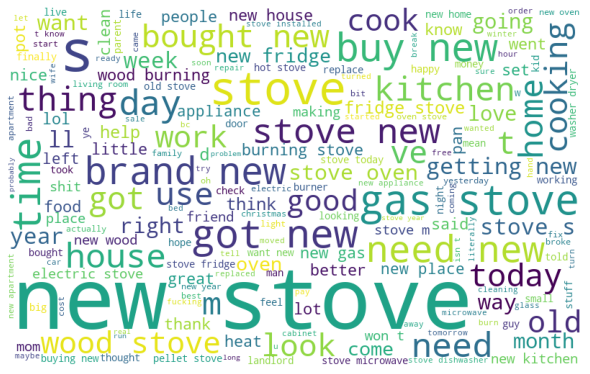

In [12]:
#creating a wordcloud
temp=' '.join(finaldf['Tweet_nonstop'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [17]:
week_groups_resample.to_csv('W_test2.csv', index=False)

NameError: name 'week_groups_resample' is not defined

In [6]:
#check number of tweets and the number of users that posted
print("The total number of Tweets is",len(finaldf), "posted by {} different users".format(finaldf['username'].nunique()))


The total number of Tweets is 54 posted by 52 different users


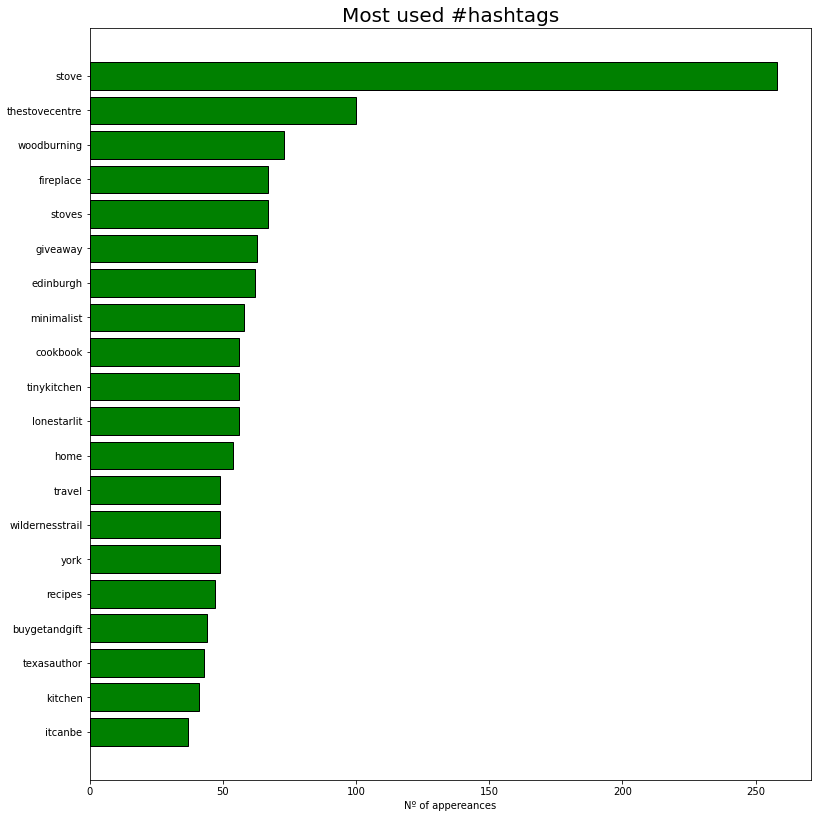

In [13]:
week_groups_resample.to_csv('W_test2.csv', index=False)

In [14]:
#finaldf['date'] = finaldf['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
finaldf['date'] = pd.to_datetime(finaldf['date'],dayfirst=True) #change date column datatype to datetime


#finaldf2['date'] = pd.to_datetime(finaldf['date'], unit='s')

                       

        

In [60]:
finaldf.to_csv('teeeest2.csv')

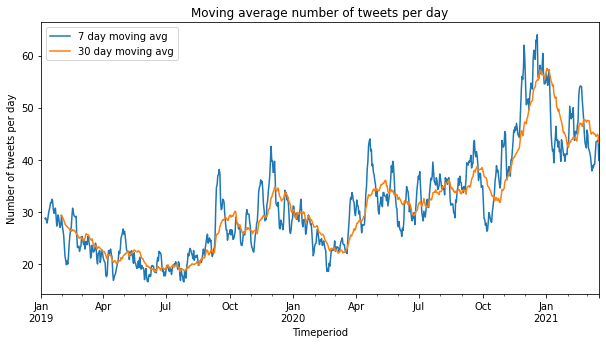

In [16]:
#Rolling avg number of tweets per day
data1 = finaldf.sort_values('date').set_index('date')
week_groups_resample = data1.resample('D').count()
ax = week_groups_resample["tweet"].rolling(7).mean().plot(kind='line',figsize=(10,5),label="7 day moving avg")
ax = week_groups_resample["tweet"].rolling(30).mean().plot(kind='line',figsize=(10,5),label="30 day moving avg")
ax.set_title(label="Moving average number of tweets per day");
ax.set_xlabel("Timeperiod");
ax.set_ylabel("Number of tweets per day");
leg = ax.legend();
#ax.set_xticklabels(data1.index.strftime('%Y-%m-%d'), rotation=90) 
#plt.xlabel('Date - Week Starting');


In [30]:
week_groups_resample.head(-10)

,id,date,tweet,language,hashtags,cashtags,user_id,username,name,likes_count,replies_count,retweets_count,Tweet_punct,Tweet_nonstop
date2,,,,,,,,,,,,,,
2019-01-01,160,160,160,160,160,160,160,160,160,160,160,160,160,160
2019-01-02,368,368,368,368,368,368,368,368,368,368,368,368,368,368
2019-01-03,475,475,475,475,475,475,475,475,475,475,475,475,475,475
2019-01-04,502,502,502,502,502,502,502,502,502,502,502,502,502,502
2019-01-05,468,468,468,468,468,468,468,468,468,468,468,468,468,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,833,833,833,833,833,833,833,833,833,833,833,833,833,833
2021-02-06,673,673,673,673,673,673,673,673,673,673,673,673,673,673
2021-02-07,781,781,781,781,781,781,781,781,781,781,781,781,781,781


<AxesSubplot:xlabel='date'>

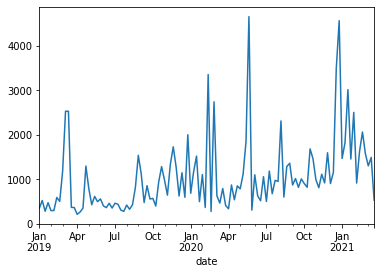

In [18]:
#count the number of likes and display in graph]
finaldf['likes_count'].groupby(finaldf['date'].dt.to_period('W')).sum().plot(kind='line')

In [19]:
####VADER Sentiment analysis####

analyser = SentimentIntensityAnalyzer()
scores=[]
for comment in finaldf['tweet']:
    sentiment_score=0
    try:
        sentiment_score=analyser.polarity_scores(comment)['compound']
    except TypeError:
        sentiment_score=0
    
    scores.append(sentiment_score)
    
finaldf['sentiment score']=scores




<AxesSubplot:xlabel='date'>

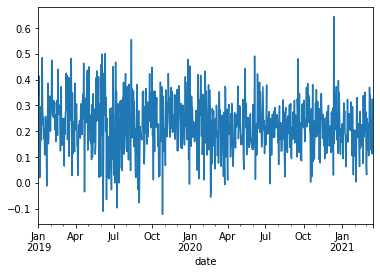

In [20]:
finaldf['sentiment score'].groupby(finaldf['date'].dt.to_period('d')).mean().plot(kind='line')

In [21]:
##Getting the average sentiment scores for each day
data2 = finaldf.sort_values('date').set_index('date')
sentimentscore = data2['sentiment score'].resample('D').mean()
sentimentscore = pd.DataFrame(sentimentscore)

In [22]:
#Adding the number of tweets per day to the dataframe
sentimentscore['tweets pd'] = week_groups_resample['tweet']

In [23]:
sentimentscore

,sentiment score,tweets pd
date,,
2019-01-01,0.341000,23
2019-01-02,0.414660,35
2019-01-03,0.278545,31
2019-01-04,0.020358,26
2019-01-05,0.061589,27
...,...,...
2021-03-14,0.243400,43
2021-03-15,0.112433,48
2021-03-16,0.324639,46


In [25]:
##Calculate thresholds to trigger new trend alert
sentimentscore['Yearly%change'] = sentimentscore['30DMVA'].pct_change(365)

In [24]:
##Calculating 30 day MVA of number of tweets
sentimentscore['30DMVA'] = sentimentscore['tweets pd'].rolling(30).mean()

In [26]:
sentimentscore

,sentiment score,tweets pd,30DMVA,Yearly%change
date,,,,
2019-01-01,0.341000,23,NaN,NaN
2019-01-02,0.414660,35,NaN,NaN
2019-01-03,0.278545,31,NaN,NaN
2019-01-04,0.020358,26,NaN,NaN
2019-01-05,0.061589,27,NaN,NaN
...,...,...,...,...
2021-03-14,0.243400,43,44.466667,0.997006
2021-03-15,0.112433,48,44.700000,1.004484
2021-03-16,0.324639,46,44.900000,1.016467


In [27]:
sentimentscore.to_csv('new stove.csv')

In [6]:
df = finaldf["date"]


In [8]:
dates= []

In [12]:
from datetime import datetime
for x in df:
    date = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2)
    dates.append(date)
    

In [17]:
print(dates)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
finaldf["date2"] = dates

In [24]:
finaldf

,id,date,tweet,language,hashtags,cashtags,user_id,username,name,likes_count,replies_count,retweets_count,date2
33,1362492987863870000,44245,🤯 You won’t believe this! Sunset Graphic Bambo...,en,['skateboarding'],[],2869165352,longboardsusa,LongboardsUSA,0,0,0,2021-02-18
41,1362491761617210000,44245,#mischiefmovienightin Characters: -human man w...,en,['mischiefmovienightin'],[],939060762177425000,aspiringseymour,its ben!,0,0,0,2021-02-18
165,1362476435403920000,44245,Ok but how do you watch sk8 and the not want t...,en,[],[],3321908482,joyyyphobic,Cloud Strife’s Waifu ™,2,0,0,2021-02-18
254,1362465151971060000,44245,How different ages ride a skateboard #comedy #...,en,"['comedy', 'humor', 'skateboarding']",[],1327351819450900000,daniellabellefp,Daniel LaBelle Fans,2,0,0,2021-02-18
363,1362452727591270000,44245,Beautiful cruiser board. #longboardboard #boa...,en,"['longboardboard', 'board', 'skateboardboard',...",[],1308050642787850000,pisquaredca,Pisquared,0,0,0,2021-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515132,1080046436958360000,43466,@kegkilla211 @lyft Snap yourself skateboarding...,en,[],[],872517144,kylekirby1992,kyle kirby,1,1,0,2019-01-01
1515133,1080044251709430000,43466,Visit Orcas Island to see the wholesome skateb...,en,[],[],1005125960532810000,daytripbot,daytripbot,0,0,0,2019-01-01
1515134,1080043998373420000,43466,"RT BBC ""Lena started skateboarding at 61 and h...",en,[],[],896008604930723000,elishagiddings,Elisha Giddings,0,0,0,2019-01-01
1515135,1080043209986920000,43466,Lena started skateboarding at 61 and has never...,en,[],[],19701628,bbc,BBC,159,5,55,2019-01-01
